# Function Optimization using Tabu Search

### Import used libraries

In [22]:
# # !pip install optalgotools

# # or add optalgotools to the system path
# import sys
# sys.path.insert(0, '../')

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
from optalgotools.algorithms import TabuSearch
from optalgotools.problems import ContinuousFunctionBase

### Sphere Function

The Sphere function is defined as:

$f(x) = \sum_{i=1}^{n} x_i^2$

where $ x = (x_1, x_2, \dots, x_n) $ is a vector of $n$ variables. In the 2-dimensional case, this simplifies to:

$f(x) = x_1^2 + x_2^2$

### Rastrigin Function

The Rastrigin function is defined as:

$f(x) = A \cdot n + \sum_{i=1}^{n} \left( x_i^2 - A \cdot \cos(2\pi x_i) \right)$

where:
- $A = 10$ is a constant,
- $ x = (x_1, x_2, \dots, x_n) $ is a vector of $n$ variables.

In the 2-dimensional case, this becomes:

$f(x) = 20 + x_1^2 - 10 \cdot \cos(2\pi x_1) + x_2^2 - 10 \cdot \cos(2\pi x_2)$

In [24]:
# Define the Sphere function
def Sphere(x, y):
    return x**2 + y**2

# Define the Rastrigin function
def Rastrigin(x, y):
    A = 10
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

## Visualize Sphere and Rastrigin funciton

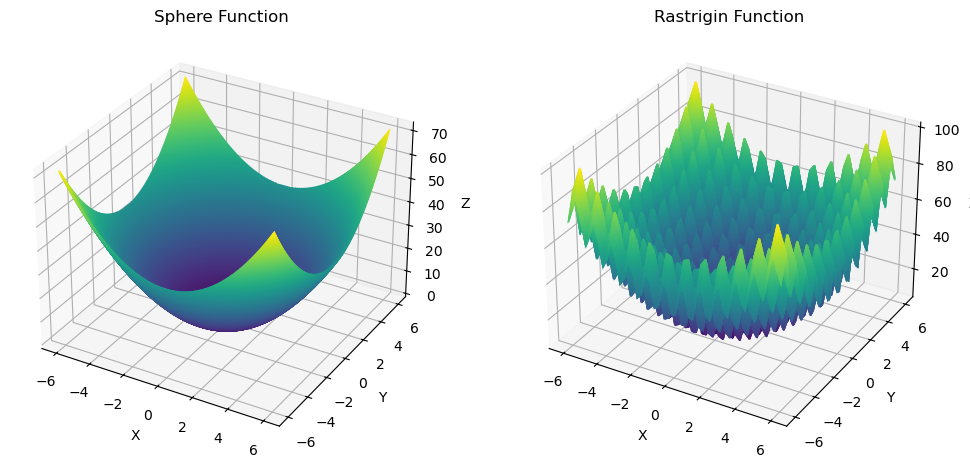

In [25]:
X=np.linspace(-6,6)
Y=np.linspace(-6,6)

x,y=np.meshgrid(X,Y)

X, Y = np.meshgrid(x, y)
Z_sphere = Sphere(x,y)
Z_rastrigin = Rastrigin(x, y)

# Create 3D plots for both functions
fig = plt.figure(figsize=(12, 6))

# Sphere plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.contour3D(x,y,Z_sphere,450)
ax1.set_title('Sphere Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Rastrigin plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.contour3D(x,y,Z_rastrigin,450)
ax2.set_title('Rastrigin Function')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
plt.show()

### Finding minimum value using tabu search

Solving Sphere function:
Tabu search is initialized:
current value = 17.956465768926467
Tabu search is done: 
curr iter: 100, curr best value: 8.92420794581154e-05, curr best: sol: [ 0.00022078 -0.00944422], found at iter: 43


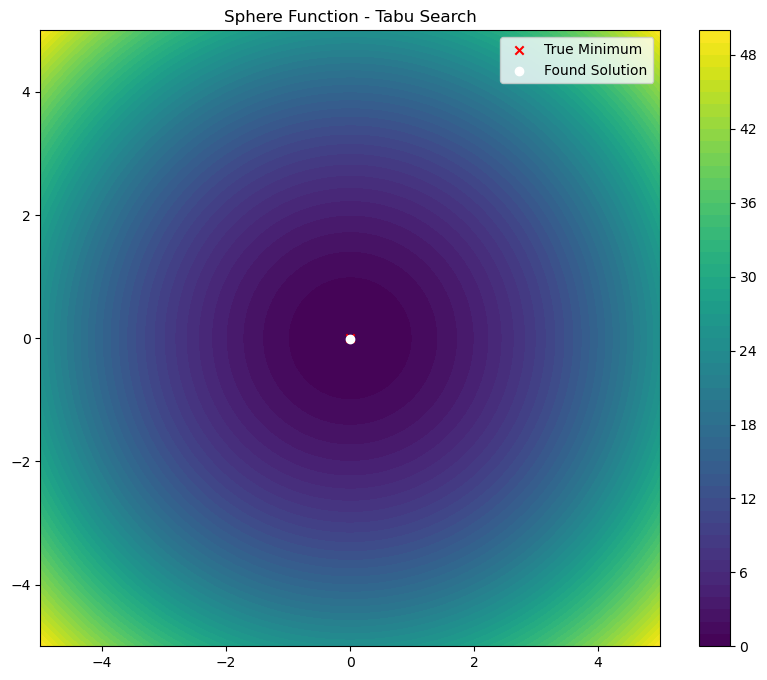

Solving Rastrigin function:
Tabu search is initialized:
current value = 37.527116213566885
Tabu search is done: 
curr iter: 100, curr best value: 0.007026674243466147, curr best: sol: [0.00515126 0.0029808 ], found at iter: 34


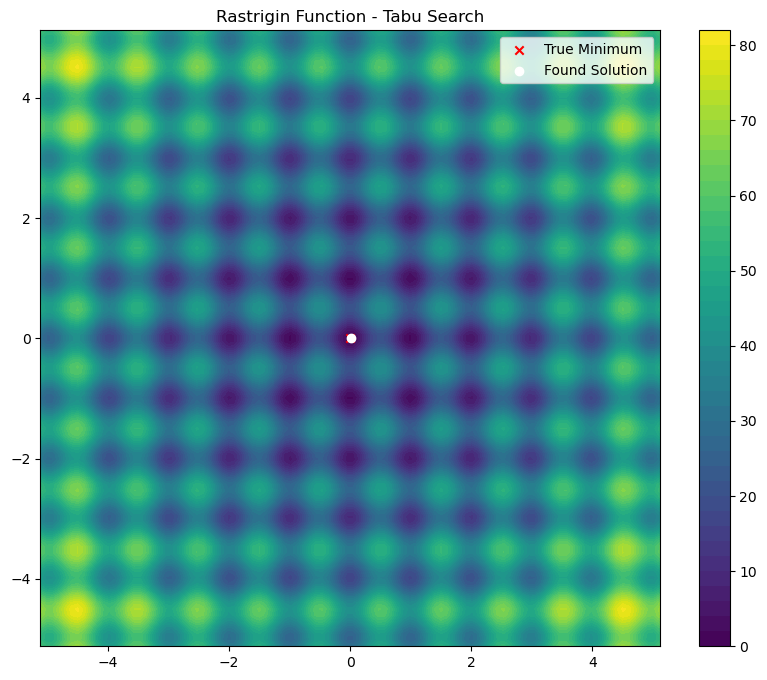

In [26]:
# Define the bounds for Sphere and Rastrigin
sphere_bounds = np.asarray([[-5, 5], [-5, 5]])  # For Sphere function
rastrigin_bounds = np.asarray([[-5.12, 5.12], [-5.12, 5.12]])  # For Rastrigin function

# Create ContinuousFunctionBase objects for Sphere and Rastrigin
sphere_obj = ContinuousFunctionBase(Sphere, sphere_bounds)
rastrigin_obj = ContinuousFunctionBase(Rastrigin, rastrigin_bounds)

# Define the function to plot the function and the found solution
def plot_function(f, best_x, best_f, true_min, bounds, title):
    X, Y = np.meshgrid(np.linspace(bounds[0], bounds[1], 100),
                        np.linspace(bounds[0], bounds[1], 100))
    
    Z = np.zeros_like(X)  # Initialize Z as a 2D array
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j])  # Directly call the function f(x, y)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar()
    plt.scatter(true_min[0], true_min[1], color='red', marker='x', label='True Minimum')
    plt.scatter(best_x[0], best_x[1], color='white', marker='o', label='Found Solution')
    plt.title(title)
    plt.legend()
    plt.show()

# Define the TabuSearch solver for Sphere and Rastrigin functions
ts_sphere = TabuSearch(max_iter=100, tabu_tenure=5, neighbor_size=50, use_aspiration=True, aspiration_limit=2, use_longterm=False, debug=1)

# Run the Tabu Search solver on the Sphere function
print("Solving Sphere function:")
ts_sphere.run(sphere_obj)

# Extract the best solution from the TabuSearch using the s_best attribute
best_x_sphere = ts_sphere.s_best  # Extract the best solution
best_f_sphere = ts_sphere.val_best  # Extract the best value from TabuSearch

# Plot the Sphere function with the true minimum and found solution
plot_function(Sphere, best_x_sphere, best_f_sphere, true_min=[0, 0], bounds=[-5, 5], title="Sphere Function - Tabu Search")

# Define the TabuSearch solver for Rastrigin function
ts_rastrigin = TabuSearch(max_iter=100, tabu_tenure=5, neighbor_size=50, use_aspiration=True, aspiration_limit=2, use_longterm=False, debug=1)

# Run the Tabu Search solver on the Rastrigin function
print("Solving Rastrigin function:")
ts_rastrigin.run(rastrigin_obj)

# Extract the best solution from the TabuSearch using the s_best attribute
best_x_rastrigin = ts_rastrigin.s_best  # Extract the best solution
best_f_rastrigin = ts_rastrigin.val_best  # Extract the best value from TabuSearch

# Plot the Rastrigin function with the true minimum and found solution
plot_function(Rastrigin, best_x_rastrigin, best_f_rastrigin, true_min=[0, 0], bounds=[-5.12, 5.12], title="Rastrigin Function - Tabu Search")


### Himmelblau's function
$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$

The Himmelblau function has four identical local minima at:
* f(3.0, 2.0)=0
* f(−2.805118, 3.131312)=0
* f(−3.779310, −3.283186)=0
* f(3.584428, −1.848126)=0

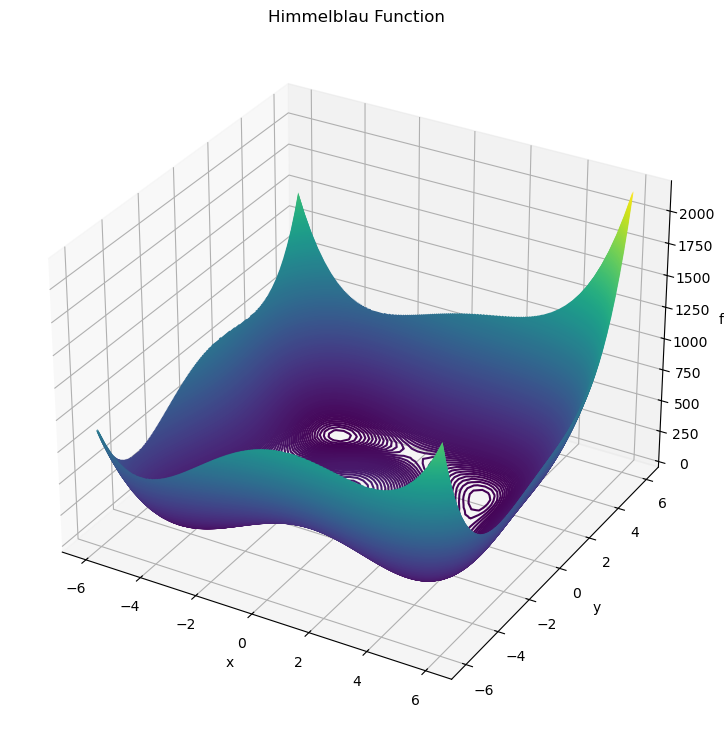

In [27]:
# Define the objective function
def Himmelblau(x,y):
       return (((x**2+y-11)**2) + (((x+y**2-7)**2)))

X=np.linspace(-6,6)
Y=np.linspace(-6,6)

x,y=np.meshgrid(X,Y)
f=Himmelblau(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,f,450)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.set_title('Himmelblau Function')
plt.show()
#plt.savefig('CH06_F07_Himmelblau.png', format='png', dpi=300)

In [28]:
# Define the bounds
Himmelblau_bounds = np.asarray([[-6, 6], [-6, 6]])

# Create a continous function object
Himmelblau_obj = ContinuousFunctionBase(Himmelblau, Himmelblau_bounds)

# Define TS solver. Adding debug = 1 to print initial and final solution
ts = TabuSearch(max_iter=100, tabu_tenure=5, neighbor_size=50, use_aspiration=True, aspiration_limit=2, use_longterm=False, debug=1)

# Run the solver
ts.run(Himmelblau_obj)

Tabu search is initialized:
current value = 570.6106069092904
Tabu search is done: 
curr iter: 100, curr best value: 0.013260142356763961, curr best: sol: [2.99448958 1.97619842], found at iter: 17


## Mishra's Bird Function
$f(x,y)=sin(x)e^{(1-cos(y))^2}+cos(y)e^{(1-sin(x))^2}+(x-y)^2$

Subject to this constraint: $(x+5)^2+(y+5)^2<25$

This function has two global minima at f(x*)= −106.764537 located at (4.70104 ,3.15294) and (−1.58214 ,−3.13024). 

The search domain is usually: $-10 \le x \le 0$ and $-6.5 \le y \le 0$

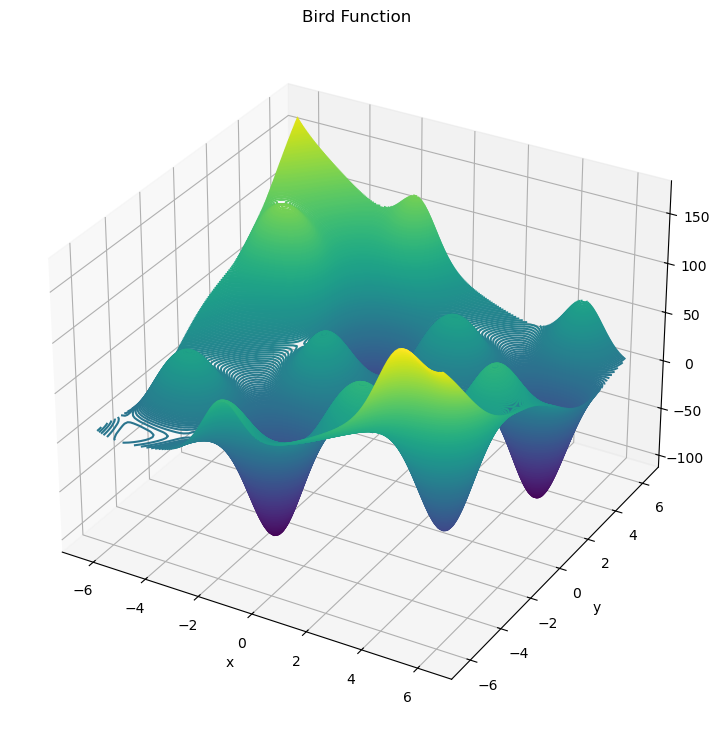

In [29]:
def Bird(x,y):
 return np.sin(x)*(np.exp(1-np.cos(y))**2)+np.cos(y)*(np.exp(1-np.sin(x))**2)+(x-y)**2

X=np.linspace(-2*math.pi,2*math.pi,100)
Y=np.linspace(-2*math.pi,2*math.pi,100)

x,y=np.meshgrid(X,Y)
f=Bird(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,f,450)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.set_title('Bird Function')
plt.show()

In [30]:
# Define the bounds
Bird_bounds = np.asarray([[-10,0], [-6.5,0]])

# Create a continous function object
Bird_obj = ContinuousFunctionBase(Bird, Bird_bounds)

# Define TS solver. Adding debug = 1 to print initial and final solution
ts = TabuSearch(max_iter=100, tabu_tenure=5, neighbor_size=50, use_aspiration=False, use_longterm=False, debug=1)

# Run the solver
ts.run(Bird_obj)

soln=ts.s_best

# Check violation of the constraint and keep running the solver until a feasible solution is found
while ((soln[0]+5)**2+(soln[1]+5)**2) >= 25:
    ts.run(Bird_obj)
    soln=ts.s_best

print('Feasible solution')
print(soln)
print('Best value of the objective value is', ts.val_allbest)

Tabu search is initialized:
current value = -29.232598564316202
Tabu search is done: 
curr iter: 100, curr best value: -106.77087865759393, curr best: sol: [-1.58962462 -3.13712545], found at iter: 79
Feasible solution
[-1.58962462 -3.13712545]
Best value of the objective value is -106.77087865759393
